# Overview/Review

## Supervised Machine Learning

* The outcome variable is known and we are training the model using that information. 
* Output variables in supervised learning have "labels", meaning we know what we are trying to predict.
* The goal is to approximate the mapping function so well that when you have new input data (x) that you can predict the output variables $h_θ(x)$ for that data.
* It is a preocess where you have input variables (x) and an output variable $h_θ(x)$ and you use an algorithm to learn the mapping function from the input to the output.        

$$
h_θ(x) = f(X)
$$

## Supervised Machine Learning Process

* Correct answers(labels) to the training set are known. 
* The algorithm iteratively makes predictions on the training data and checks it against the correct answers. 
* Wrong predictions are corrected. 
* The process of correction is called **Learning**. 
* Learning stops when the algorithm achieves an acceptable level of performance.

## Examples of Supervised Learning
    
   - Predicting if a patient will survive or not given a set of medical test results
   - Predicting sales a company will make in a given financial year

## Regression vs Classification

+ **Regression Problems**: have dependent variables we are trying to predict are continuous values or ordered whole values. 
    - E.g. Predicting the house prices, sales of a company, points scored by a sports a team etc.

+ **Classification Problems**: have dependent variables we are trying to predict are categorical and sometimes unordered. 
    - E.g. Predicting the survivor of Titanic disaster, if a patient has a particular disease etc.



* If there is continuity between possible outcomes, then the problem is a regression problem. 

## Algorithms

**Examples of Regression Algorithms**

* Ordinary Linear Regression
* L1 Regression
* L1+L2 RegressionDecision
* Random Forest Regressor
* Gradient Boosting Machine Regressor

**Examples of Classification Algorithms**

* Logistic Regression
* SVM
* Trees Classifier
* Random Forest Classifier
* Gradient Boosting Machine Classifier

## Metrics

**Examples of Regression Metrics**

* Mean Squared Error
* Mean Absolute Error

**Examples of Classification Metrics**

* Confusion Matrix
* Accuracy
* Precision and Recall 
* f1
* AUC

# Linear Regression Intuition:

## Sample Data

Consider the following data with heights and corresponding weights of samples of a particular species of a plant.

In [4]:
import pandas as pd
import numpy as np

df = pd.DataFrame({"height(cm)": [10, 24, 43, 35, 52],
                   "weight(kg)": [1.2, 3.1, 3.8, 2.7, 5.8]})
df

,height(cm),weight(kg)
0,10,1.2
1,24,3.1
2,43,3.8
3,35,2.7
4,52,5.8


Let's say we want to predict the weight of a plant having the height of 29 cm.

* We have been given the dataset with correct weights corresponsing to the heights of some samples. Hence, it is a supervised learning problem.
* Since values of weights can be continuous, it is a regression problem.

## Terminology: Predictors vs Response Variables:

We are trying to predict weight using the value of height, 

- height is called **predictor** or **independent** variable. 
- weight is called **response** or **dependent** variable.

## Visualizing Data

Here is how the scatter plot of the data looks like.

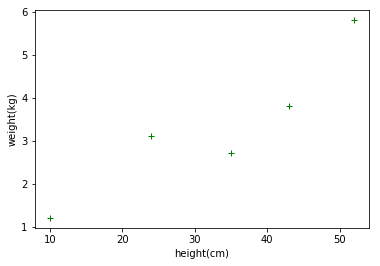

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(df["height(cm)"], df["weight(kg)"], "g+")
plt.xlabel('height(cm)')
plt.ylabel('weight(kg)')
plt.show()

## Fitting a rough linear model

Clearly, height holds positive correlation with weight. More the height, more the weight.

In order to predict the weight of a 29cm tall plant, let's use the line as shown in the graph. The equation of the line is 

>$weight = 0.1 + 0.1* height$

It seems to fit the pattern of the scatter plot.

## Visualization

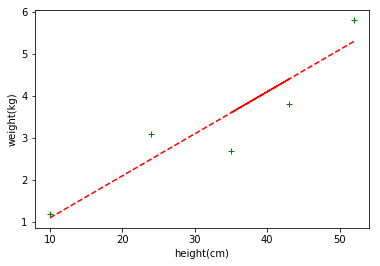

In [6]:
plt.plot(df["height(cm)"], df["weight(kg)"], "g+")
plt.plot(df["height(cm)"], 0.1 + 0.1*df["height(cm)"], "r--")
plt.xlabel('height(cm)')
plt.ylabel('weight(kg)')
plt.show()

## First Inference

Using this line, we can say that the weight of the plant with 29 cm height is _3.0 kg_.

Congratulations! You just attempted your first linear regression problem. 

## Terminology: Univariate vs Multivariate Regression

- Here, we are using only one predictor (height) to predict the weight. Hence, it is called  **Univariate Regression**. 
- If we use more than one predictors to predict the weight (dependent variable), then it would be called **Multivariate Regression**.

## Terminology: Notations

- $x^{(i)}$ denotes the predictors 
- $y^{(i)}$ denotes the response variable (weight). 
- For example, in our case: $x^{(4)}$ = 35 and $y^{(1)}$ = 1.2

----------
- Superscript “(i)” in the notation is simply an index into the training set, and has nothing to do with exponentiation. 
- A pair ($x^{(i)}$ , $y^{(i)}$) is called a training example. 
- For example, 2nd training example, ($x^{(2)}$ , $y^{(2)}$) corresponds to (24, 3.1)

--------
-  The dataset used to learn—a list of m training examples {($x^{(i)}$ , $y^{(i)}$; i = 1, . . . , m} — is called a training set. 
- In this example,  m = 5

## Matrix Representation: Feature Space

* More often than not, predictors, target and coefficient are represented as matrices.
* For a sample size m and number of features n,

$$
X_{m,n+1} = 
 \begin{bmatrix}
  1 & x_{1,1} & x_{1,2} & \cdots & x_{x,n} \\
  1 & x_{2,1} & x_{2,2} & \cdots & x_{x,n} \\
  \vdots  & \vdots  & \vdots  & \ddots & \vdots  \\
  1 & x_{m,1} & x_{m,2} & \cdots & x_{m,n} 
 \end{bmatrix} 
$$

## Matrix Representation: Coefficients

$$
\Theta_{n+1, 1} = 
 \begin{bmatrix}
  \theta_{0}\\
  \theta_{1}  \\
  \theta_{2}  \\
  \vdots  \\
  \theta_{n}  
 \end{bmatrix} 
$$

## Matrix Representation: Target Matrix

$$
Y_{m,1} = 
 \begin{bmatrix}
  y_{1}  \\
  y_{2}  \\
  \vdots  \\
  y_{m}  
 \end{bmatrix} 
$$

## Hypothesis Intuition

- Our goal is, given a training set, to learn a function $h_θ (x)$ : X → Y so that $h_θ (x)$ is a _good_ predictor for the corresponding value of y. 
- This function h is called a **hypothesis**: 

>$h_θ (x) = θ_0 + θ_1 x_1$
    
- In our example, since $h_θ (x)$ is a predictor of weight. We have taken $\theta_0$ as 0.1 and $\theta_1$ as 0.1. Hence,

>$h_θ (x) = 0.1 + 0.1 * height$ 

## Hypothesis

- Here, the $θ_i$ s are the parameters parameterizing the space of linear functions mapping from X to Y. 
- We also introduce the convention of letting $x_0 = 1$ (this is the intercept term), so that 

$$h(x)=\sum_{i=0}^{n}\theta_ix_i$$


- On the right-hand side above we are viewing θ and x both as vectors, and here n is the number of input variables (not counting $x_0$).

## Matrix Representation: Hypothesis
$$
h_\theta(x) = X \Theta
$$

# Cost Function:

## Intuition

In addition to the previous line, consider two more lines,

>$weight = 0.3 + 0.09* height$, and

>$weight = 0.1 + 0.12* height$

* Now, instead of the red line, if we used greeb line or blue line, we would get weight 2.9 kg and 3.6 kg respectively.

* More formally, given a training set, how do we pick, or learn, the parameters θ? 

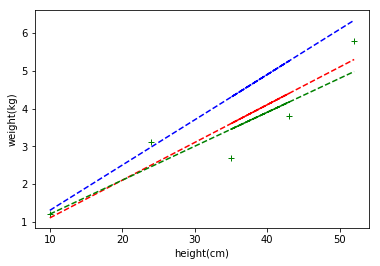

In [7]:
plt.plot(df["height(cm)"], df["weight(kg)"], "g+")
plt.plot(df["height(cm)"], 0.1 + 0.1*df["height(cm)"], "r--")
plt.plot(df["height(cm)"], 0.3 + 0.09*df["height(cm)"], "g--")
plt.plot(df["height(cm)"], 0.1 + 0.12*df["height(cm)"], "b--")
plt.xlabel('height(cm)')
plt.ylabel('weight(kg)')
plt.show()

## Cost Function Definition

* We choose $θ$ so that predicted values are as close to the actual values as possible
- We can define a mathematical function to capture the difference between the predicted and actual values. 
- This function is known as the **cost function**:

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m(h_θ(x^{(i)}) − y^{(i)})^2$$

This can be presented in matrix form.

$$J(\theta) = \frac{1}{2m}(X\theta − y)^T(X\theta − y)$$

 
- Since this function captures square of ditance, it is known as the **least-squares cost function**.

Let's calculate cost functions for the three lines for our example.

## Calculating Cost Function

In [8]:
df["red_line_cost"] = (0.1 + 0.1*df["height(cm)"] - df["weight(kg)"])**2
df["green_line_cost"] = (0.3 + 0.09*df["height(cm)"] - df["weight(kg)"])**2
df["blue_line_cost"] = (0.1 + 0.12*df["height(cm)"] - df["weight(kg)"])**2

print("J(red_line):", sum(df["red_line_cost"]))
print("J(green_line):", sum(df["green_line_cost"]))
print("J(blue_line):", sum(df["blue_line_cost"]))

('J(red_line):', 1.7899999999999989)
('J(green_line):', 1.7814000000000001)
('J(blue_line):', 5.0075999999999983)


* It seems that green line does the best job of predicting the weight since, the cost function is minimum for the green line.
* However, we cannot be sure if this is the best possible solution.
* Hence, we need to come up with a method to find the best solution.

## Deriving the closed-form solution

>$J(\theta) = \frac{1}{2m}(X\theta − y)^T(X\theta − y)$

>$J(\theta) = \frac{1}{2m} ((X\theta)^T − y^T)(X\theta − y)$

>$J(\theta) = \frac{1}{2m} ((X\theta)^T X\theta − (X\theta)^T y − y^T X\theta + y^T y)$

>$J(\theta) = \frac{1}{2m} (\theta^T X^T X \theta − 2 (X\theta)^T y + y^T y)$

## Minimizing the Error

$\frac{\partial}{\partial\theta_j}J(\theta) = (2 X^T X \theta − 2 X^T y) = 0$

$X^T X \theta = X^T y$

$$\theta = (X^T X)^{-1} X^T y$$

Let's see how closed form solution works out for our example.

Let's add another column called tickness to our dataset and make the problem _multivariate_.

## Closed-form in Python

In [26]:
df["thickness(mm)"] = [8, 13, 19, 26, 30]
df

,height(cm),weight(kg),red_line_cost,green_line_cost,blue_line_cost,thickness(mm)
0,10,1.2,0.01,0.0000,0.0100,8
1,24,3.1,0.36,0.4096,0.0144,13
2,43,3.8,0.36,0.1369,2.1316,19
3,35,2.7,0.81,0.5625,2.5600,26
4,52,5.8,0.25,0.6724,0.2916,30


In [27]:
X = np.array(df[["height(cm)", "thickness(mm)"] ])
y = np.array(df["weight(kg)"])
theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

In [28]:
theta

array([ 0.11482838, -0.02587724])

# Gradient Descent

## Gradient Descent Intuition

The value of the cost function depends on the values of ($\theta_0$, $\theta_1$). In our example,

- ($\theta_0$, $\theta_1$) for red line: (0.1, 0.1)
- ($\theta_0$, $\theta_1$) for green line: (0.3, 0.09)
- ($\theta_0$, $\theta_1$) for blue line: (0.1, 0.12)

In general, cost function is a function of parameter matrix $\theta$. We want to choose θ so as to minimize J(θ). To do so, let’s use a search algorithm that starts with some “initial guess” for θ, and that repeatedly changes θ to make J(θ) smaller, until hopefully we converge to a value of θ that minimizes J(θ). 

One such algorithm is the gradient descent algorithm, which starts with some initial θ, and repeatedly performs the update:

>$\theta_j:= \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta)$   ...(1)

Here, α is called the **learning rate**. This is a very natural algorithm that repeatedly takes a step in the direction of steepest decrease of J.

## GD Optimization

$\frac{\partial}{\partial\theta_j}J(\theta)$ in eq.(1) can be simplified as following

>$\frac{\partial}{\partial\theta_j}J(\theta) = \frac{\partial}{\partial\theta_j} \frac{1}{2} (h_θ(x) − y)^2$

>$\frac{\partial}{\partial\theta_j}J(\theta) = 2 * \frac{1}{2} (h_θ(x) − y) * \frac{\partial}{\partial\theta_j}  (h_θ(x) − y)$

>$\frac{\partial}{\partial\theta_j}J(\theta) = (h_θ(x) − y) * \frac{\partial}{\partial\theta_j}  (\sum_{i=0}^{n}\theta_ix_i − y)$

>$\frac{\partial}{\partial\theta_j}J(\theta) = (h_θ(x) − y) * x_j$

Hence, for a single training example, eq.(1) becomes

>$\theta_j:= \theta_j + \alpha  (y^{(i)} - h_θ(x^{(i)})) * x^{(i)}_j$

For the training set, eq.(1) becomes

>$\theta_j:= \theta_j + \alpha \sum_{i=1}^{m}(y^{(i)} - h_θ(x^{(i)})) * x^{(i)}_j$

Here, $x_j$ is the corresponding predictor for $\theta_j$. 
- For example, predictor corresponding to  $\theta_1$ and 2nd training example, $x^{(2)}_1$ is 24. 
- Value for all $x^{(i)}_0$ is equal to 1.

## GD Algorithm

To get the optimal value of $\theta$, perform follwoing algorithm known as the **Batch Gradient Descent Algorithm** 

1. Assume initial $\theta$
- Calculate $h(\theta)$ for i=1 to m
- Calculate $J(\theta)$. Stop when value of $J(\theta)$ attains global/local minima
- Calculate $\sum_{i=1}^{m}(y^{(i)} - h_θ(x^{(i)})) * x^{(i)}_j$ for all $\theta_j$'s
- Calculate new $\theta_j$'s
- Go to step 2

Let's apply the Gradient Descent algorithm to our example. 

- We initialise $\theta_j$'s with the blue line $\theta_j$
- We assume $\alpha$ to be 0.1

## GD in action

In [5]:
import numpy as np

In [1]:
# y = theta * x + b
def error_calculator(b, theta, points):
    data = np.array(points)
    x = data[:,0]
    y = data[:,-1]
    y_predicted = theta * x + b
    error = np.sum((y - y_predicted)**2) / data.shape[0]
    return  error

In [2]:
def gradient(b_current, theta_current, points, learningRate):
    data = np.array(points)
    x = data[:, 0]
    y = data[:, 1]
    N = data.shape[0]
    b_gradient = -2 * np.sum(y - (theta_current * x + b_current)) / N
    theta_gradient = -2 * np.sum(x * (y - (theta_current * x + b_current))) / N
    new_b = b_current - (learningRate * b_gradient)
    new_theta = theta_current - (learningRate * theta_gradient)
    return new_b, new_theta

In [3]:
def gradient_descent(points, starting_b, starting_theta, learning_rate, num_iterations):
    b = starting_b
    theta = starting_theta
    b_list = []
    theta_list = []
    error_list = []
    for i in range(num_iterations):
        b, theta = step_gradient(b, theta, points, learning_rate)
        error = compute_error_for_line_given_points(b, theta, points)
        b_list.append(b)
        theta_list.append(theta)
        error_list.append(error)
    return b_list, theta_list, error_list

In [6]:
points = np.genfromtxt("data/data.csv", delimiter=",")
learning_rate = 0.0001
initial_b = 2 # initial y-intercept guess
initial_m = 6 # initial slope guess
num_iterations = 15

In [130]:
error_before = error_calculator(initial_b, initial_m, points)
b, theta, error = gradient_descent(points, initial_b, initial_m, learning_rate, num_iterations)
error_after = error_calculator(b[-1], theta[-1], points)

In [131]:
print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, error_before)
print "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b[-1], theta[-1], error_after)

Starting gradient descent at b = 2, m = 6, error = 51903.5527927
After 15 iterations b = 1.91110404492, m = 1.44207599024, error = 111.653003167


In [132]:
import matplotlib.pyplot as plt
%matplotlib inline

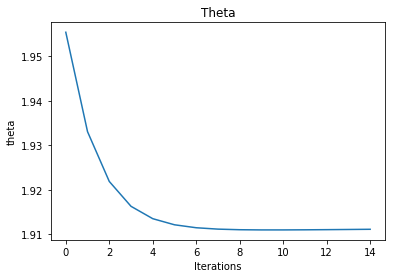

In [139]:
plt.plot(b)
plt.xlabel("Iterations")
plt.ylabel("theta")
plt.title("Theta");

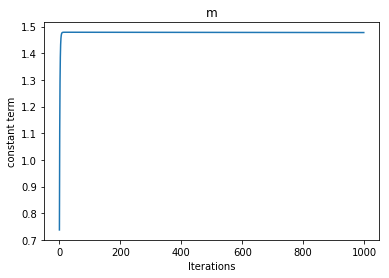

In [138]:
plt.plot(m)
plt.xlabel("Iterations")
plt.ylabel("constant term")
plt.title("m");

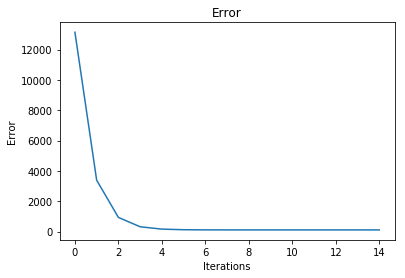

In [137]:
plt.plot(error)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Error");

## Closed-form Solution vs Gradient Descent Solution: where and how we use them

* Closed form solution provides values of theta such that the value of cost function is at its global minima.
* On the other hand, GD provides approximate solutions, and depending on the learning rate and weight initialization, it can also provide a solution where const function is at its local minima.

However, CFS is not very practical because 

1. It is computationally very expensive ([read more here](https://stats.stackexchange.com/questions/23128/solving-for-regression-parameters-in-closed-form-vs-gradient-descent))
2. Singularity. The inverse of a matrix might not exist ([wikipedia](https://en.wikipedia.org/wiki/Invertible_matrix))
1. For most nonlinear regression problems there is no closed form solution.

## Importance of preprocessing (normalization, standardization)

## Assessing Model
- Metrics
- Visualizations

## Assumptions and their validation

**Linear relationship:** Relationship between response and feature variables should be linear. 
* The linearity assumption can be tested using scatter plots.

**Little or no multi-collinearity:** It is assumed that there is little or no multicollinearity in the data.
* Multicollinearity occurs when the features (or independent variables) are not independent from each other.

**Little or no auto-correlation:** There should be little or no autocorrelation in the data. Autocorrelation occurs when the residual errors are not independent from each other.

**Homoscedasticity:** Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables and the dependent variable) is the same across all values of the independent variables. 

* As shown below, figure 1 has homoscedasticity while figure 2 has heteroscedasticity.



**Sources:**

* [Quora](https://www.quora.com/What-is-supervised-learning)
- [CS229 - Andrew Ng, Stanford University](http://cs229.stanford.edu/notes/cs229-notes1.pdf)
- [STAT 501 - PennState Eberly College of Science](https://onlinecourses.science.psu.edu/stat501/node/251)
- [Online Stat Book](http://onlinestatbook.com/2/regression/intro.html)
- [Machine Learning Mastery](http://machinelearningmastery.com/simple-linear-regression-tutorial-for-machine-learning/)
* [Machine Learning Mastery](http://machinelearningmastery.com/supervised-and-unsupervised-machine-learning-algorithms/)